In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_fd7a3fcd2dda49b8a8f8507ca635f81e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mC4kc4LdEW6OWYmTQeOm1c9f0kojBxlGkwftfpWJ_pUT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e)

body = client_fd7a3fcd2dda49b8a8f8507ca635f81e.get_object(Bucket='minorproject-donotdelete-pr-fyphfcxvpxslbo',Key='parkinsons_updrs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_OG = pd.read_csv(body)
df_OG.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [2]:
df_OG.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [3]:
df_OG.shape

(5875, 22)

In [4]:
df=df_OG.copy()
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
df['UPDRS']=df['total_UPDRS']
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [6]:
df.drop(['total_UPDRS'], axis=1, inplace=True)
df.drop(['subject#'],axis=1,inplace=True)
df.head()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
0,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [7]:
df.isnull().sum().sort_values(ascending=False)

UPDRS            0
Shimmer          0
sex              0
test_time        0
motor_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer(dB)      0
PPE              0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
age              0
dtype: int64

In [8]:
df.describe()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,...,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,29.018942
std,8.821524,0.465656,53.445602,8.129282,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,...,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,10.700283
min,36.000000,0.000000,-4.262500,5.037700,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,...,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,7.000000
25%,58.000000,0.000000,46.847500,15.000000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,...,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,21.371000
50%,65.000000,0.000000,91.523000,20.871000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,...,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,27.576000
75%,72.000000,1.000000,138.445000,27.596500,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,...,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,36.399000
max,85.000000,1.000000,215.490000,39.511000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,...,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,54.992000


In [9]:
df.dtypes

age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
UPDRS            float64
dtype: object

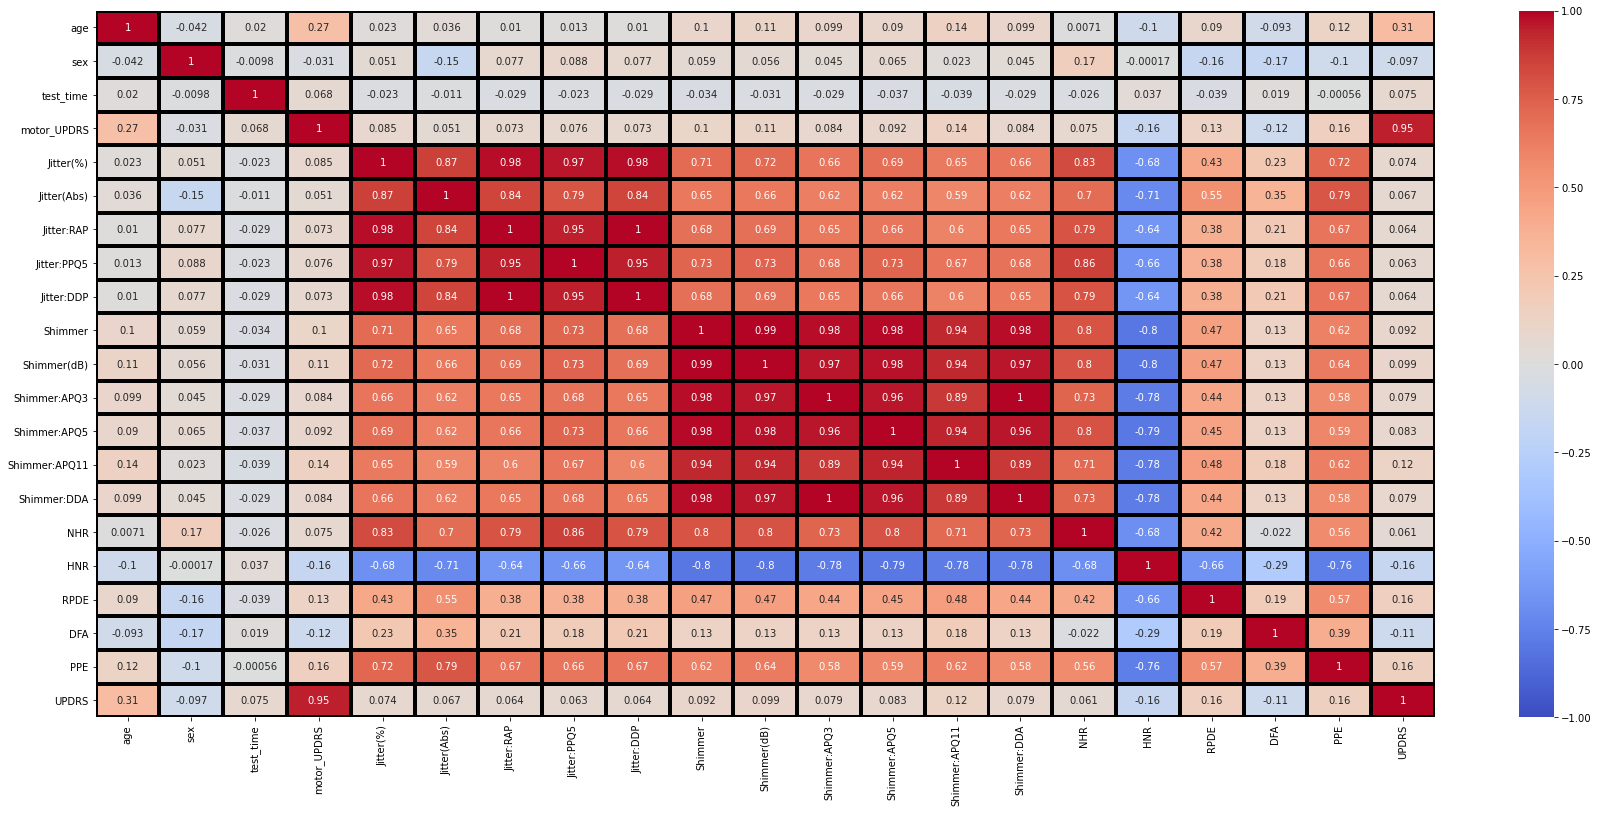

In [10]:
#df1=df[df.columns[1:]].corr()['UPDRS']
plt.figure(figsize=(30,13))
heatmap=sns.heatmap(df.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')

In [26]:
df1=df.copy()
df1.drop(['motor_UPDRS'], axis=1, inplace=True)
df1.head()
df1.tail()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
5870,61,0,142.79,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,33.485
5871,61,0,149.84,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,32.988
5872,61,0,156.82,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,32.495
5873,61,0,163.73,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,32.007
5874,61,0,170.73,0.00282,0.000021,0.00135,0.00166,0.00406,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336,31.513


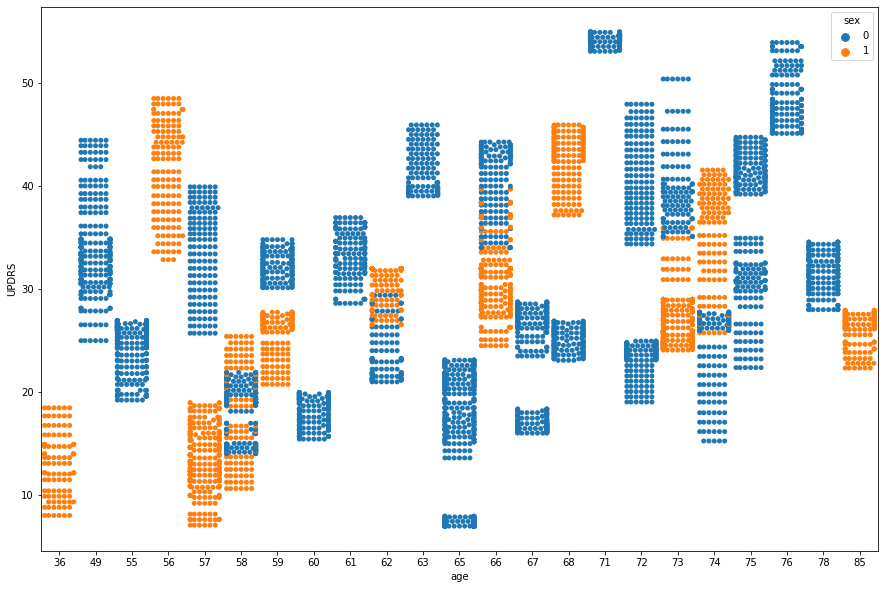

In [12]:
plt.figure(figsize=(15,10))
sns.swarmplot(df1['age'],df1['UPDRS'], hue=df1['sex'])

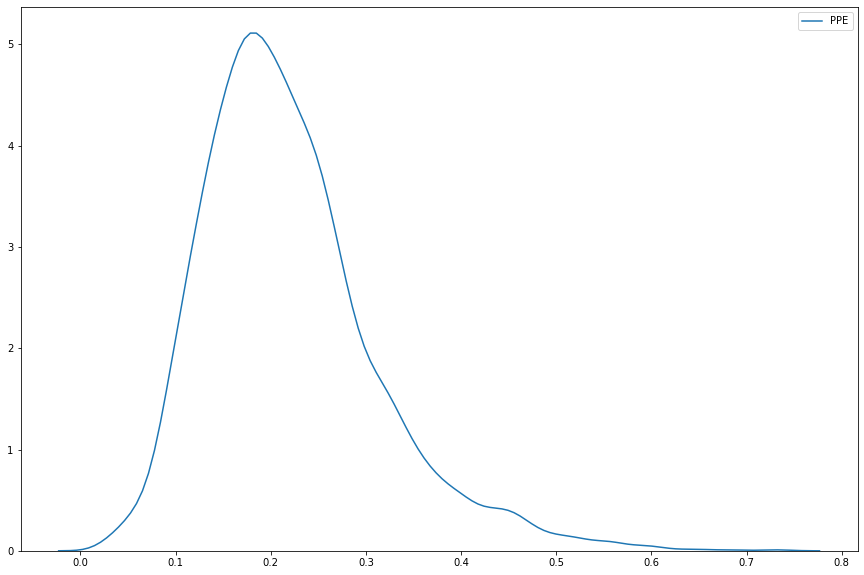

In [13]:
plt.figure(figsize=(15,10))
#sns.distplot(df['UPDRS'], hist=False)
sns.kdeplot(df['PPE'])
#Add here 2 plots of ppe, one for parkinsons and no parkinsons

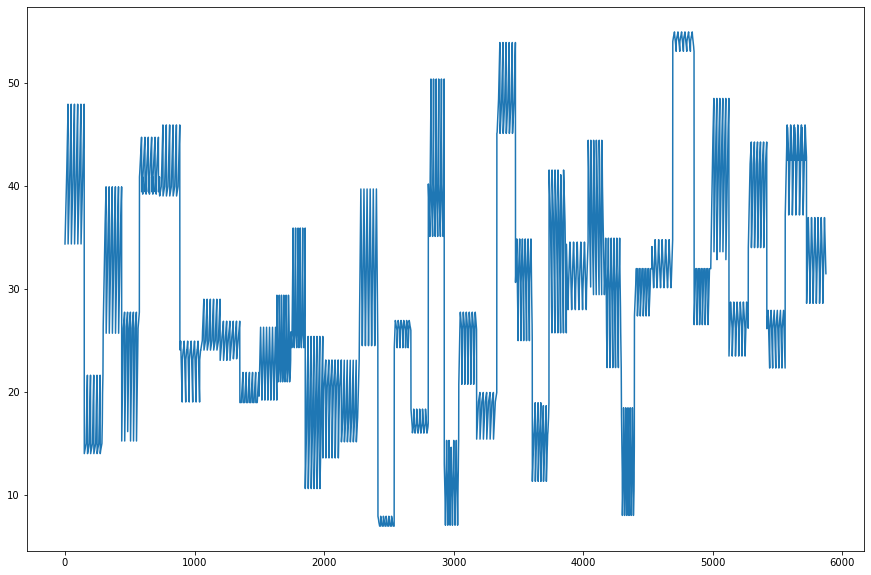

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df1['UPDRS'])

# SVM

In [15]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,3)) #Customer range ka transformer
y_test = y_test.reshape(-1, 1)# Converting 1D to something coz compiler giving BT
y_train = y_train.reshape(-1, 1)
x_train = sc.fit_transform(x_train)#standard transform
x_test = sc.transform(x_test)
y_test=scaler.fit_transform(y_test)
y_train=scaler.fit_transform(y_train) #Custom transform
y_train=np.around(y_train,0) #Round off 1.2 to 1, 2.7 ko 3 etc
y_test=np.around(y_test,0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train.max()#Bas testing
y_train

array([[3],
       [2],
       [1],
       ...,
       [2],
       [0],
       [1]])

In [18]:
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
#y_test=scaler.fit_transform(y_test)
#y_train=scaler.fit_transform(y_train)
y_train=y_train.flatten() #Converting to 1D array coz SVC deals 1D array 
y_test=y_test.flatten() 
y_train

array([3, 2, 1, ..., 2, 0, 1])

([<matplotlib.axis.XTick at 0x7f1cb695a850>,
 <a list of 4 Text major ticklabel objects>)

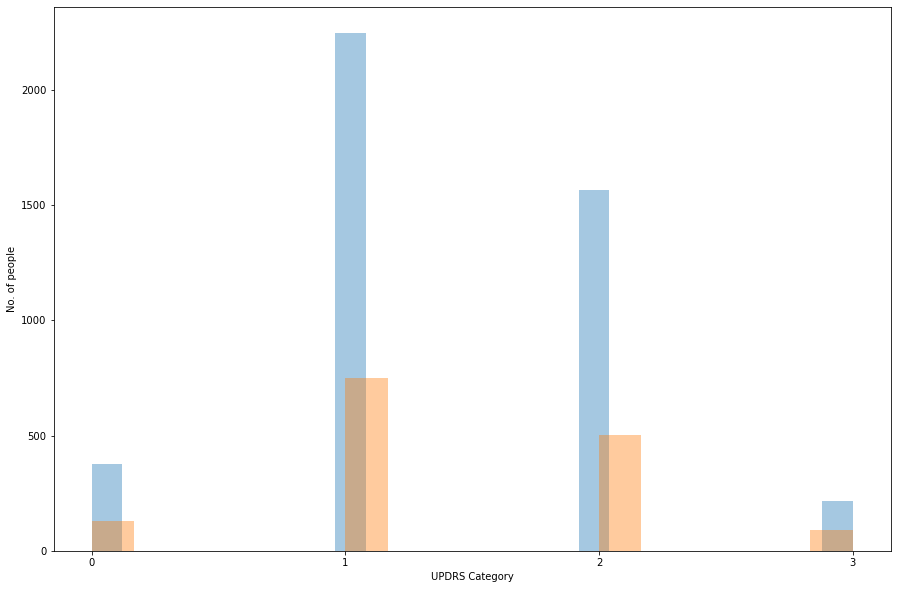

In [19]:
plt.figure(figsize=(15,10))
sns.distplot(y_train, kde=False)
sns.distplot(y_test, kde=False)
plt.xlabel("UPDRS Category")
plt.ylabel("No. of people")
plt.xticks([0,1,2,3])

In [20]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='poly', degree=4, C=10000)  #Tuning parameters
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9230769230769231

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[121,   6,   3,   1],
       [ 10, 698,  40,   0],
       [  0,  37, 459,   5],
       [  1,   0,  10,  78]])

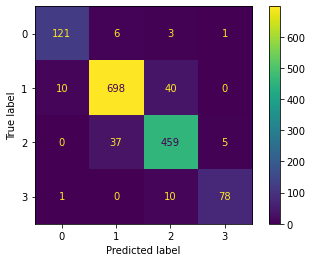

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test, y_test)

In [24]:
plt.figure(figsize=(15,10))
sns.histplot(y_test, color="Yellow", alpha=0.5)
sns.histplot(pred, color="Green", alpha=0.5)
#sns.scatterplot(y_test,y_test.shape[0])
#sns.scatterplot(pred,pred.shape[0])
plt.xticks([0,1,2,3])
#plt.figure.legend

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 1080x720 with 0 Axes>

#  Decision Tree

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26)
print(y)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clfDF = DecisionTreeRegressor(random_state=0)
 
model = clfDF.fit(X_train, y_train)
print(model)

In [ ]:
pred = model.predict(X_test)
print("Score is",model.score(X_test,y_test))